# An Analysis on the Most Popular Steam Games
This Jupyter notebook contains the visualisations made in this project.

## Business Case
This project considers a hypothetical game studio that wants to know what type of game has the highest chance of succeeding on the Steam platform.

This project is an exploration into the features and trends of successful games on the Steam platform.

## Notebook Structure
- [Identifying Features of Most Popular Games](#identifying-features-of-current-most-popular-games)
- [Determining Most Successful Payment Model](#pricing-model)
- [Historic Trends](#historic-trends)

## About This Notebooks
This notebook has been designed to be interacted with (if desired) through the *controllable variables*.
Such variables are clearly labelled a the top of each code section, when available.

Additionally, this notebook has been designed to be as dynamic as possible, using as little 'static' code as possible.

This enables this notebook (with particular focus on the visualisations) to function properly even with changes to the controllable variables.

### Notebook Setup

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Reading in data collected first-hand
dataset = '912 Samples'
stats_file = 'Stats.csv'
details_file = 'Details.csv'
io_path_base = f'../Data Analysis Project 1/Datasets/{dataset}/'

# Stats Datafile
df_stats = pd.read_csv(f'{io_path_base}{stats_file}')

# Details Datafile
df_details = pd.read_csv(f'{io_path_base}{details_file}')

### A Quick Look at the Data
I have provided samples of the two DataFrames below.

In [2]:
df_details.head()

,Game Title,Price,Single Player,Online PvP,Online Co-Op,In-App Purchases,Tags
0,Counter-Strike 2,£0,False,True,False,True,"['Shooter', 'Multiplayer', 'Online Co-Op', 'Te..."
1,Dota 2,£0,False,True,False,True,"['Strategy', 'Co-op', 'Multiplayer', 'Free to ..."
2,Apex Legends,£0,False,True,True,True,"['Shooter', 'Multiplayer', 'Free to Play', 'Te..."
3,NARAKA: BLADEPOINT,£0,False,True,False,True,"['Female Protagonist', 'Survival', 'Massively ..."
4,Grand Theft Auto V,£29.98,True,True,True,False,"['Mature', 'Automobile Sim', 'Crime', 'Shooter..."


In [3]:
df_stats.head()

,Game Title,Rank,Date,Avg. Players,Peak Players
0,Counter-Strike 2,1,5-2024,931542.77,1618685
1,Counter-Strike 2,1,4-2024,930748.98,1618685
2,Counter-Strike 2,1,3-2024,885629.69,1521796
3,Counter-Strike 2,1,2-2024,786630.82,1347519
4,Counter-Strike 2,1,1-2024,760859.23,1277907


## Step 1: Identifying Features of Current Most Popular Games
First, we take a look at the most common *tags* of the top 100 popular games, where game popularity is determined by the current player count at the time of collection.

These findings will dictate which kind of games the developers should consider developing.

#### What are Tags?
'Tags' function as video game descriptors, providing details about the game.

Some examples of tags are: *action*, *RPG*, and *multi-player*.

It's important to note that these tags are **not** standardised and can contain redundancies.
For example, one game has been observed to contain both the 'Shooter' and 'FPS' (stands for First Person Shooter) tags.

As such, some degree of qualitative analysis is needed to ensure the accuracy these results.

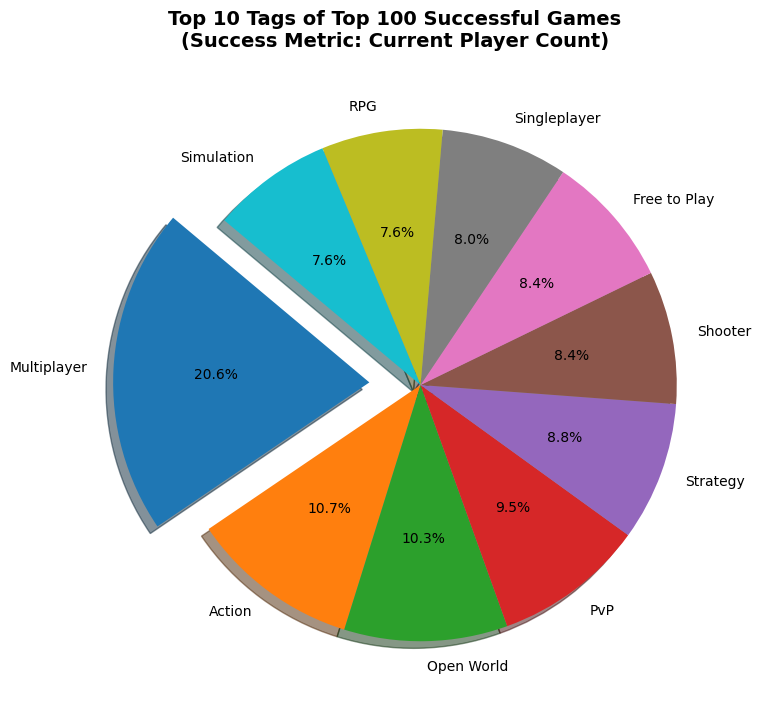

In [4]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_tags = 10 # Number of tags to display in pie chart
wedgedistance = [0.2] # Wedge distance of most prevalent tag
# ---------------------------- #

# Isolate tags column
df_game_tags = df_details['Tags']

# Count the frequency of the tags across the games
tag_frequency_dict = dict()

# For each game
for rank in range(no_games):
        
        # Get current game's tags
        cur_tag_list = df_game_tags.iloc[rank].replace('[', '').replace(']','').replace('\'','').split(',')
        cur_tag_list = [x.strip() for x in cur_tag_list]

        # For each tag
        for tag in cur_tag_list:
            
            # If tag already seen, update its counter
            if tag in tag_frequency_dict:
                tag_frequency_dict.update({tag:tag_frequency_dict.get(tag) + 1})
            else:
                 tag_frequency_dict.update({tag:1})
                  
# Order the dictionary by tag frequency
tag_frequency_dict = dict(sorted(tag_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Isolate keys and values
labels = list(tag_frequency_dict.keys())
values = list(tag_frequency_dict.values())

# Dynamic setting of explosion values
[wedgedistance.append(0) for x in range(1,no_tags)] 

# Pie plot
plt.figure(figsize=(8,8))
plt.pie(values[:no_tags], labels=labels[:no_tags], autopct='%1.1f%%', startangle=140, explode=wedgedistance, shadow = True)
plt.axis('equal')
plt.title(f'Top {no_tags} Tags of Top {no_games} Successful Games\n(Success Metric: Current Player Count)\n', 
          fontsize=14, 
          fontweight='bold')
plt.show()


### Chart Summary
It's clearly indicated that multiplayer games (i.e. games with online capabilities) are the most successful type of game, and by a significant margin.

**Note:** The current visualisation does not show the relationship between the tags.
8% of the top 100 games have the 'single-player' tag, but it is not clear what percentage of these games are exclusively single-player, and what percentage also have a multiplayer mode (and tag).

#### Sample Data Bias
It is important to note that ranking games in such a manner, using their current player count as an indicator of success, biases the data in favour of multiplayer games.

Such a bias exists due to multiplayer games being incapable of being 'completed' (unlike single-player games with a clear narrative and objective ending), and extremely high levels of replay value.

With the publicly accessible data, using a game's player count is one of the best approaches when conducting a large scale quantitative analysis to determine the features of a successful game.

### Most Successful Multi-Player Games 
With multiplayer games having been identified as the most successful type of game, we take a quick look into the most common tags found alongside multiplayer games.

In other words, 'what kind of multiplayer games are most successful?'.

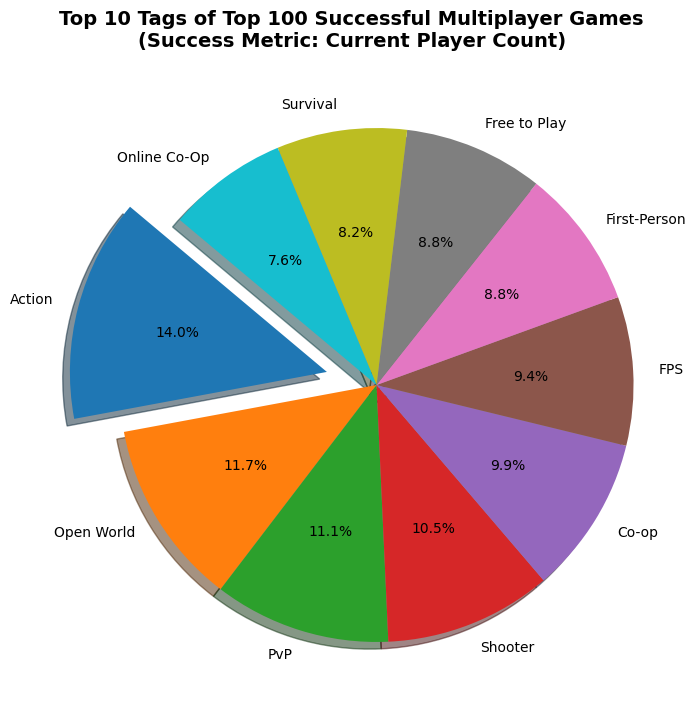

In [5]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_tags = 10 # Number of tags to display in pie chart
wedgedistance = [0.2] # Wedge distance of most prevalent tag
# ---------------------------- #

# Isolate tags column
df_game_tags = df_details['Tags']

# Count the frequency of the tags
multiplayer_tag_frequency_dict = dict()

# For each game
for rank in range(no_games):
        
        # Get list of tags
        cur_tag_list = df_game_tags.iloc[rank].replace('[', '').replace(']','').replace('\'','').split(',')
        cur_tag_list = [x.strip() for x in cur_tag_list]

        # If the game is not multiplayer, skip it
        if 'Multiplayer' not in cur_tag_list:
             continue

        for tag in cur_tag_list:

            # We are not recording the multiplayer tag
            if 'multiplayer' in tag.lower():
                 continue
            
            # If tag already seen, update its counter
            if tag in multiplayer_tag_frequency_dict:
                multiplayer_tag_frequency_dict.update({tag:multiplayer_tag_frequency_dict.get(tag) + 1})
            else:
                 multiplayer_tag_frequency_dict.update({tag:1})
                  
# Order the dictionary by tag frequency
multiplayer_tag_frequency_dict = dict(sorted(multiplayer_tag_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Isolate keys and values
labels = list(multiplayer_tag_frequency_dict.keys())
values = list(multiplayer_tag_frequency_dict.values())

# Dynamic setting of explosion values
[wedgedistance.append(0) for x in range(1,no_tags)]

# Pie plot
plt.figure(figsize=(8,8))
plt.pie(values[:no_tags], 
        labels=labels[:no_tags],
        autopct='%1.1f%%',
        startangle=140,
        explode=wedgedistance,
        shadow = True,
        )
plt.axis('equal')
plt.title(f'Top {no_tags} Tags of Top {no_games} Successful Multiplayer Games\n(Success Metric: Current Player Count)\n', 
          fontsize=14,
          fontweight='bold')
plt.show()


### Chart Summary
Action-based games are shown to be the most successful multiplayer games.

As with the previous plot, the relationship and overlap between these tags is not shown.
<!-- For example, 'Shooter' and 'FPS' (First-Person Shooter) are shown as two separate tags, yet significant overlap is expected between the two as FPS is a sub-category of shooter. -->

It is expected that a significant number of games with the 'Action' tag will have signifiant overlap with the other tags in the pie chart (PvP, Shooter, and Survival).

More granular details can be provided on request, though, at this time, it is appears to be clear that action-based multiplayer games is the best route for the game studio.

## Step 2: Choosing a Pricing Model
With the knowledge of multiplayer, action-based games being the most successful type of game, the next step is identifying a suitable payment model.

Namely: *paid* or *free-to-play*.
<!-- 
    - General f2p vs paid 
    - Multiplayer 
-->

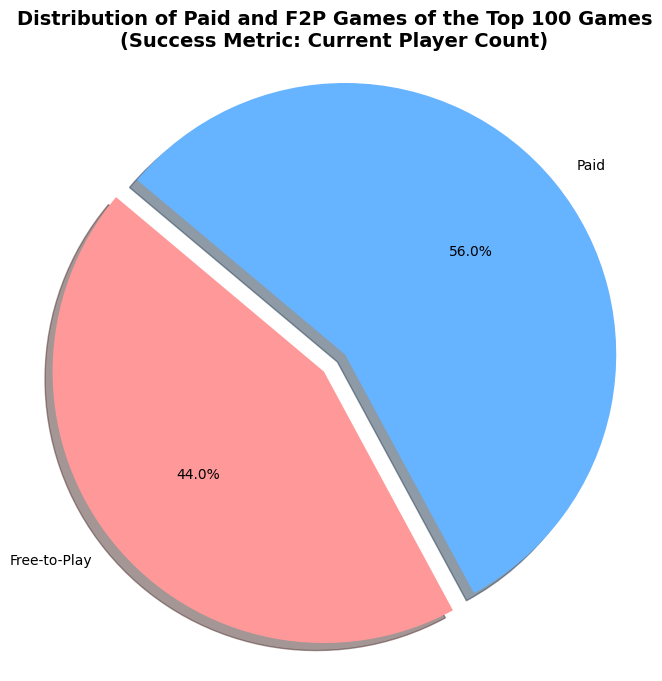

In [6]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column
df_game_prices = df_details['Price']

# Count number of games that are free
free_game_counter = 0
for rank in range(no_games):
    if df_game_prices.iloc[rank].strip() == '£0':
        free_game_counter += 1

# Custom colours
colours = ['#ff9999', '#66b3ff']

# Pie plot 
plt.figure(figsize=(8,8))
explode = (0.1,0)
plt.pie([free_game_counter, (no_games - free_game_counter)], 
        labels=['Free-to-Play', 'Paid'],
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        colors=colours,
        explode=explode)
plt.axis('equal')
plt.title(f'Distribution of Paid and F2P Games of the Top 100 Games\n(Success Metric: Current Player Count)',
          fontsize=14,
          fontweight='bold')
plt.show()

### Chart Summary
Games following the paid model are shown to be the slightly more common pricing model in the top 100 games.

Interestingly, when the data is looked at in much greater granularity, it can be seen that the top four games are those that use the free-to-play model.

To further assist the game studio regarding the pricing of their game, let's generate a scatter and box plot to show these more granular details.

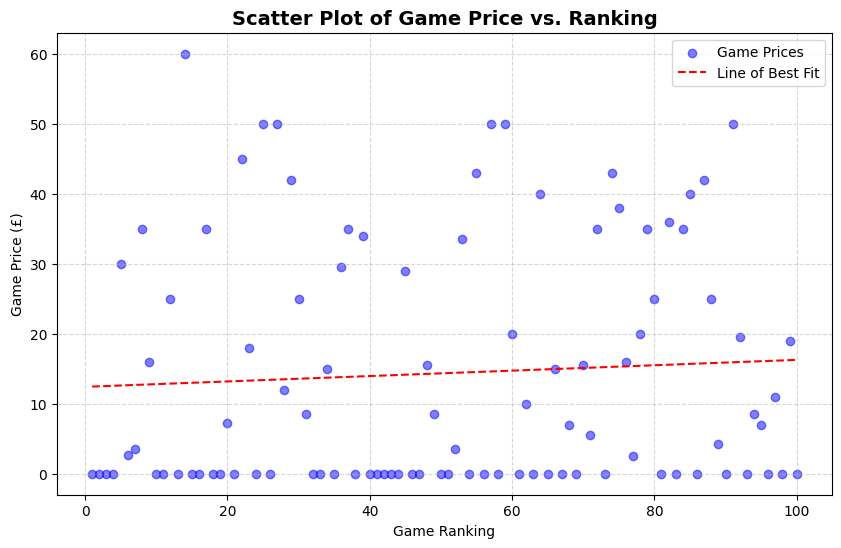

In [7]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column
df_game_prices = df_details['Price']

# Count number of games that are free
list_of_prices = []
list_of_ranks = list_of_ranks_paid_only = [i for i in range(1,no_games + 1)]
 

for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')
    list_of_prices.append(float(price))

list_of_prices_paid_only = list_of_prices

# Plot scatter
plt.figure(figsize=(10,6))
plt.scatter(list_of_ranks, list_of_prices,
            marker='o', 
            color='blue',
            alpha=0.5,
            label='Game Prices')

# Plot details
plt.title('Scatter Plot of Game Price vs. Ranking', 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Game Ranking')
plt.ylabel('Game Price (£)')

# Plot grid
plt.grid(True, linestyle='--', alpha=0.5)

# Line of best fit
list_of_prices = np.array(list_of_prices)
list_of_ranks = np.array(list_of_ranks)
slope, intercept = np.polyfit(list_of_ranks, list_of_prices, 1)
line_of_best_fit = slope * list_of_ranks + intercept
plt.plot(list_of_ranks, line_of_best_fit,
         color='red',
         linestyle='--',
         label='Line of Best Fit')

plt.legend()
plt.show()

### Chart Summary 
This visualisation informs that there is a slight negative correlation between the popularity of a game and its price, indicating lower priced games are more successful.

Interestingly, when games under the free-to-play model are excluded, the correlation between game popularity and price skews positive. 

There are definitely many other factors at play, which can be explored further on request. 

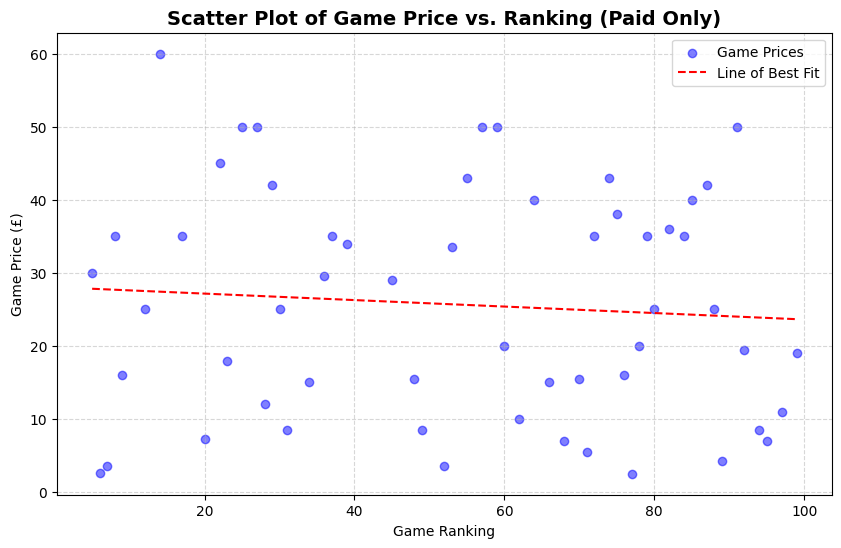

In [8]:
index_to_remove = []
for index in range(no_games):
    if list_of_prices_paid_only[index] == 0:
        index_to_remove.append(index)
        
index_to_remove.sort(reverse=True)

for index in index_to_remove: 
    del list_of_prices_paid_only[index]
    del list_of_ranks_paid_only[index]


# Plot scatter
plt.figure(figsize=(10,6))
plt.scatter(list_of_ranks_paid_only, list_of_prices_paid_only,
            marker='o', 
            color='blue',
            alpha=0.5,
            label='Game Prices')

# Plot details
plt.title('Scatter Plot of Game Price vs. Ranking (Paid Only)', 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Game Ranking')
plt.ylabel('Game Price (£)')

# Plot grid
plt.grid(True, linestyle='--', alpha=0.5)

# Line of best fit
list_of_prices = np.array(list_of_prices_paid_only)
list_of_ranks = np.array(list_of_ranks_paid_only)
slope, intercept = np.polyfit(list_of_ranks, list_of_prices, 1)
line_of_best_fit = slope * list_of_ranks + intercept
plt.plot(list_of_ranks, line_of_best_fit,
         color='red',
         linestyle='--',
         label='Line of Best Fit')

plt.legend()
plt.show()

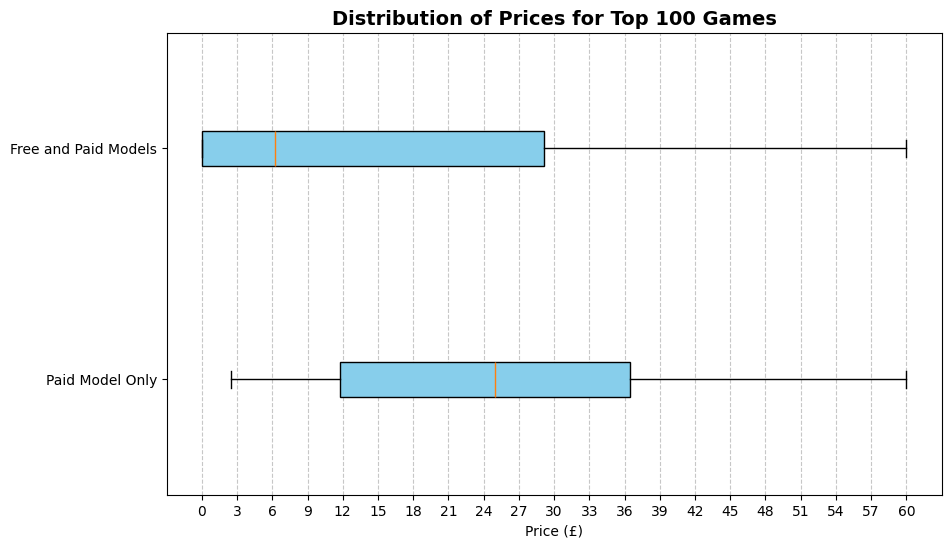

In [9]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column 
df_game_prices = df_details['Price']

# List of prices (paid only)
list_of_prices_paid_only = []
for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')

    if price == '0':
        continue

    list_of_prices_paid_only.append(float(price))

# List of prices (including free)
list_of_prices_all = []
for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')
    list_of_prices_all.append(float(price))

# Plot 
plt.figure(figsize=(10,6))
plt.boxplot([list_of_prices_paid_only, list_of_prices_all], 
                vert=False,
                patch_artist=True, #Enable boxplot colouring
                boxprops=dict(facecolor='skyblue'),
            )

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Price (£)')
plt.yticks([1,2], ['Paid Model Only', 'Free and Paid Models'])
plt.xticks(np.arange(0, max(list_of_prices_paid_only) + 1, (max(list_of_prices_paid_only)/20)))

plt.title(f'Distribution of Prices for Top {no_games} Games',
          fontsize=14,
          fontweight='bold')
plt.show()


### Chart Summary 
A box plot is generated to provide a more easily digestible visualisation regarding the pricing of the top 100 successful games.

This plot shows a slight negative skew in price, with the majority of the paid games priced between appx. £12 and £37 (when considering only the paid model).

If the game studio wishes to deploy their game under the paid model, it is recommended for the studio to stay within this range, if costs allow.

## Historic Trends
The visualisations above tell us that low-priced (averaging appx. £6 or £25), multiplayer action games are those which are most successful.

However, is there a historic precedent regarding the pricing of successful games?\
Or is the current state of successful games an outlier (and likely not to be long lasting)?

Let's take a look!
<!-- 
What percentage of the top avg. 100 games 

1. Line graph two lines (paid, free-to-play)
    - y-axis percentage 
    - x-axis (month, year)
    
2. Weighted bar plots (free-to-play and genre) [horizontal]
    - y-axis percentage 
    - x-axis (month, year)
    
    -->

### Historic Trends (Free vs Paid)

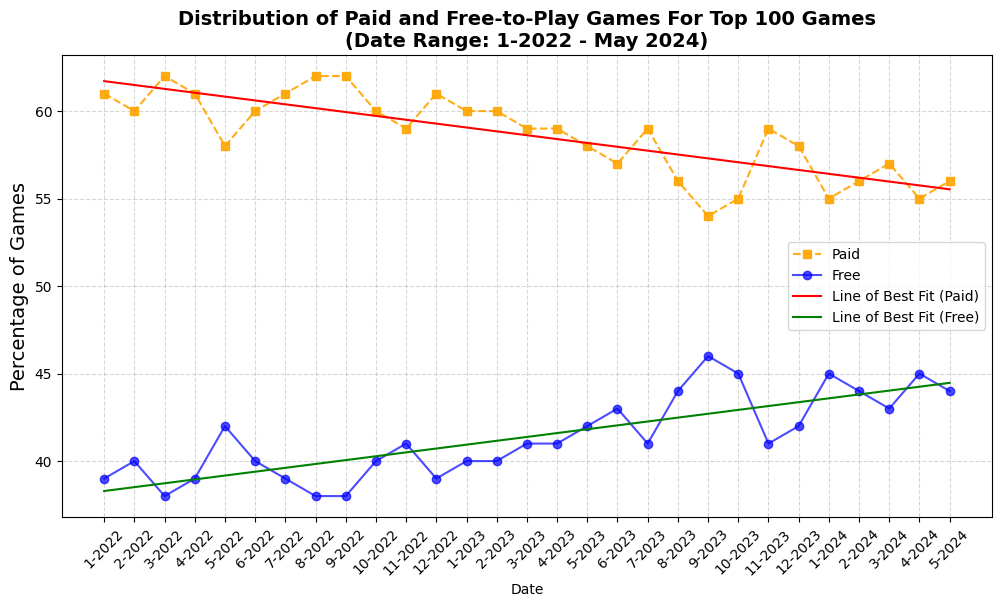

In [12]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_years = 2 # We are looking at the last x years of data
# ---------------------------- #

from datetime import datetime

# List of months
list_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
current_month = 'May' 
#current_month = list_of_months[datetime.now().month-1] # NOTE: If error, change to 'May'

# List of years
current_year = datetime.now().year
list_of_years = [str(current_year-x) for x in range(no_years, -1, -1)]
current_year = str(current_year)

# Plotting variables
list_of_dates = []
list_of_percentage_free = []
list_of_percentage_paid = []

# Get each game's avg player count for each date
break_loop = False
for year in list_of_years:
    for month in list_of_months:
        
        # Base Case - Current Year
        if year == current_year and month == current_month:
            current_date = '5-2024'
            break_loop = True
        else:
            current_date = f'{list_of_months.index(month)+1}-{year}'

        # Isolate ALL games for the given date
        temp_df = df_stats[df_stats['Date'] == current_date] # Get all games for current month
        temp_df = temp_df.sort_values(by='Avg. Players', ascending=False) # Order by avg players
        
        # Get price of top x games
        list_of_prices = []
        for rank in range(no_games):
            game_title = temp_df.iloc[rank]['Game Title']
            df_price= df_details[df_details['Game Title']== game_title]['Price']
            price = df_price.iloc[0].replace('£', '').strip()
            list_of_prices.append(float(price))
        
        # Calculate percentage of free vs paid in top x games
        count_free = sum(1 for x in list_of_prices if x == 0.0)

        # Store percentages in lists
        list_of_dates.append(current_date)
        list_of_percentage_free.append((count_free / len(list_of_prices)) * 100)
        list_of_percentage_paid.append(((len(list_of_prices)-count_free)/len(list_of_prices)) * 100)

        if break_loop is True:
            break

    if break_loop is True:
        break

# Plot figure
plt.figure(figsize=(12,6))
plt.plot(list_of_percentage_paid, label='Paid', marker='s', linestyle='--', color='orange', alpha=0.9)
plt.plot(list_of_percentage_free, label='Free', marker='o', linestyle='-', color='blue', alpha=0.7)

# Grid
plt.grid(True,
         alpha=0.5, 
         linestyle='--')

# Text details
plt.ylabel('Percentage of Games', fontsize=14)
plt.xlabel('Date')
plt.title(f'Distribution of Paid and Free-to-Play Games For Top 100 Games\n(Date Range: {list_of_dates[0]} - {current_month} {current_year})',
          fontsize=14,
          fontweight='bold')
plt.xticks(range(len(list_of_dates)), list_of_dates, rotation=45) 

# Calculate the line of best fit for the 'Paid' plot
slope_paid, intercept_paid = np.polyfit(range(len(list_of_percentage_paid)), list_of_percentage_paid, 1)
line_of_best_fit_paid = slope_paid * np.array(range(len(list_of_percentage_paid))) + intercept_paid
plt.plot(line_of_best_fit_paid, label='Line of Best Fit (Paid)', color='red', linestyle='-')

# Calculate the line of best fit for the 'Free' plot
slope_free, intercept_free = np.polyfit(range(len(list_of_percentage_free)), list_of_percentage_free, 1)
line_of_best_fit_free = slope_free * np.array(range(len(list_of_percentage_free))) + intercept_free
plt.plot(line_of_best_fit_free, label='Line of Best Fit (Free)', color='green', linestyle='-')
plt.legend(frameon=True)

plt.show()

# NOTE: BROKEN IMPORT LINK 
# from sklearn.metrics import r2_score

# # Calculate R^2 
# r2_paid = r2_score(list_of_percentage_paid, line_of_best_fit_paid)
# r2_free = r2_score(list_of_percentage_free, line_of_best_fit_free)

# print(f"R^2 of 'Paid' line of best fit:", r2_paid)
# print("R^2 of 'Free' line of best fit:", r2_free)

### Graph Summary 
The above visualisation confirms the stability (regarding the paid model comprising the majority of the top 100 games) over the last two years.

In the above visualisation, the average player count of each month is used to order the games.

**Note:**\
There appears to be a gradual change in the trend of paid games comprising the majority of the top games, with the distance between the two distributions decreasing as time progresses.

Depending on the expected release date of the game, the payment model might be not be a significant factor to the game's success, due to the distance between the distribution the two payment models decreasing with time.

### Historic Trend (Genres)
With the historic trends of the pricing models analysed, let's see if a precedence has been set regarding the tags (i.e. the most successful genres).

Below, two visualisations are provided to show the distribution of the top multi-player genres over the last 2 years.

#### Tag Overlap
As previously mentioned, the tags used to describe the games are known to overlap and contain redundancies.\
This has been addressed slightly to increase the accuracy of the findings.

In [15]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_years = 2 # We are looking at the last x years of data
# ---------------------------- #

from datetime import datetime

# List of months
list_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
current_month = 'May' #list_of_months[datetime.now().month-1]

# List of years
current_year = datetime.now().year #NOTE: Change to '2024' if issues
list_of_years = [str(current_year-x) for x in range(no_years, -1, -1)]
current_year = str(current_year)

# Plot variable
list_of_tag_frequency_per_date = [] #list of dictionaries
list_of_dates = []

break_loop = False
# Get distribution of multi-player genres for each date
for year in list_of_years:
    for month in list_of_months:

        # Base Case - Current Year
        if year == current_year and month == current_month:
            # current_date = 'Last 30 Days' # Outdated change as a result of change in data processing
            current_date = f'{list_of_months.index(month)+1}-{year}'
            break_loop = True
        else:
            current_date = f'{list_of_months.index(month)+1}-{year}'

        # Isolate ALL games for the given date
        temp_df = df_stats[df_stats['Date'] == current_date] # Get all games for current month
        temp_df = temp_df.sort_values(by='Avg. Players', ascending=False) # Order by avg players

        # For each game, count tags
        tag_frequency_dict_per_date = dict()
        for rank in range(no_games):
            
            # Tags for each game
            cur_game_name = temp_df.iloc[rank]['Game Title']

            df_game_tags = df_details[df_details['Game Title'] == cur_game_name]['Tags']

            cur_tag_list = df_game_tags.iloc[0].replace('[', '').replace(']','').replace('\'','').split(',')
            cur_tag_list = [x.strip() for x in cur_tag_list]

            # If the game is not multiplayer, skip it
            if 'Multiplayer' not in cur_tag_list:
                continue

            # For each tag in the current game
            for tag in cur_tag_list:

                # Base Case - Don't count multiplayer tag
                if 'multiplayer' in tag.lower():
                    continue

                # Base Case - Don't count free-to-play tag
                if 'free to play' in tag.lower():
                    continue
                
                # If tag already seen, update its counter
                if tag in tag_frequency_dict_per_date:

                    match tag:
                        case 'Shooter' | 'FPS':
                            tag_frequency_dict_per_date.update({'Shooter': tag_frequency_dict_per_date.get('Shooter') + 1})
                        case 'Co-op' | 'Online Co-Op':
                            tag_frequency_dict_per_date.update({'Co-Op': tag_frequency_dict_per_date.get('Co-Op') + 1})
                        case _ :
                            tag_frequency_dict_per_date.update({tag:tag_frequency_dict_per_date.get(tag) + 1})

                else:

                    match tag:
                        case 'Shooter' | 'FPS':
                            tag_frequency_dict_per_date.update({'Shooter': 1})
                        case 'Co-op' | 'Online Co-Op':
                            tag_frequency_dict_per_date.update({'Co-Op': 1})
                        case _ :
                            tag_frequency_dict_per_date.update({tag: 1})
      
        # Order dictionary by tag frequency
        tag_frequency_dict_per_date = dict(sorted(tag_frequency_dict_per_date.items(), key=lambda item:item[1], reverse=True))

        # Update plotting variable
        list_of_tag_frequency_per_date.append(tag_frequency_dict_per_date)

        list_of_dates.append(current_date)
        # Base Case - Reached current date
        if break_loop is True:
            break

    # Base Case - Reached current date
    if break_loop is True:
        break


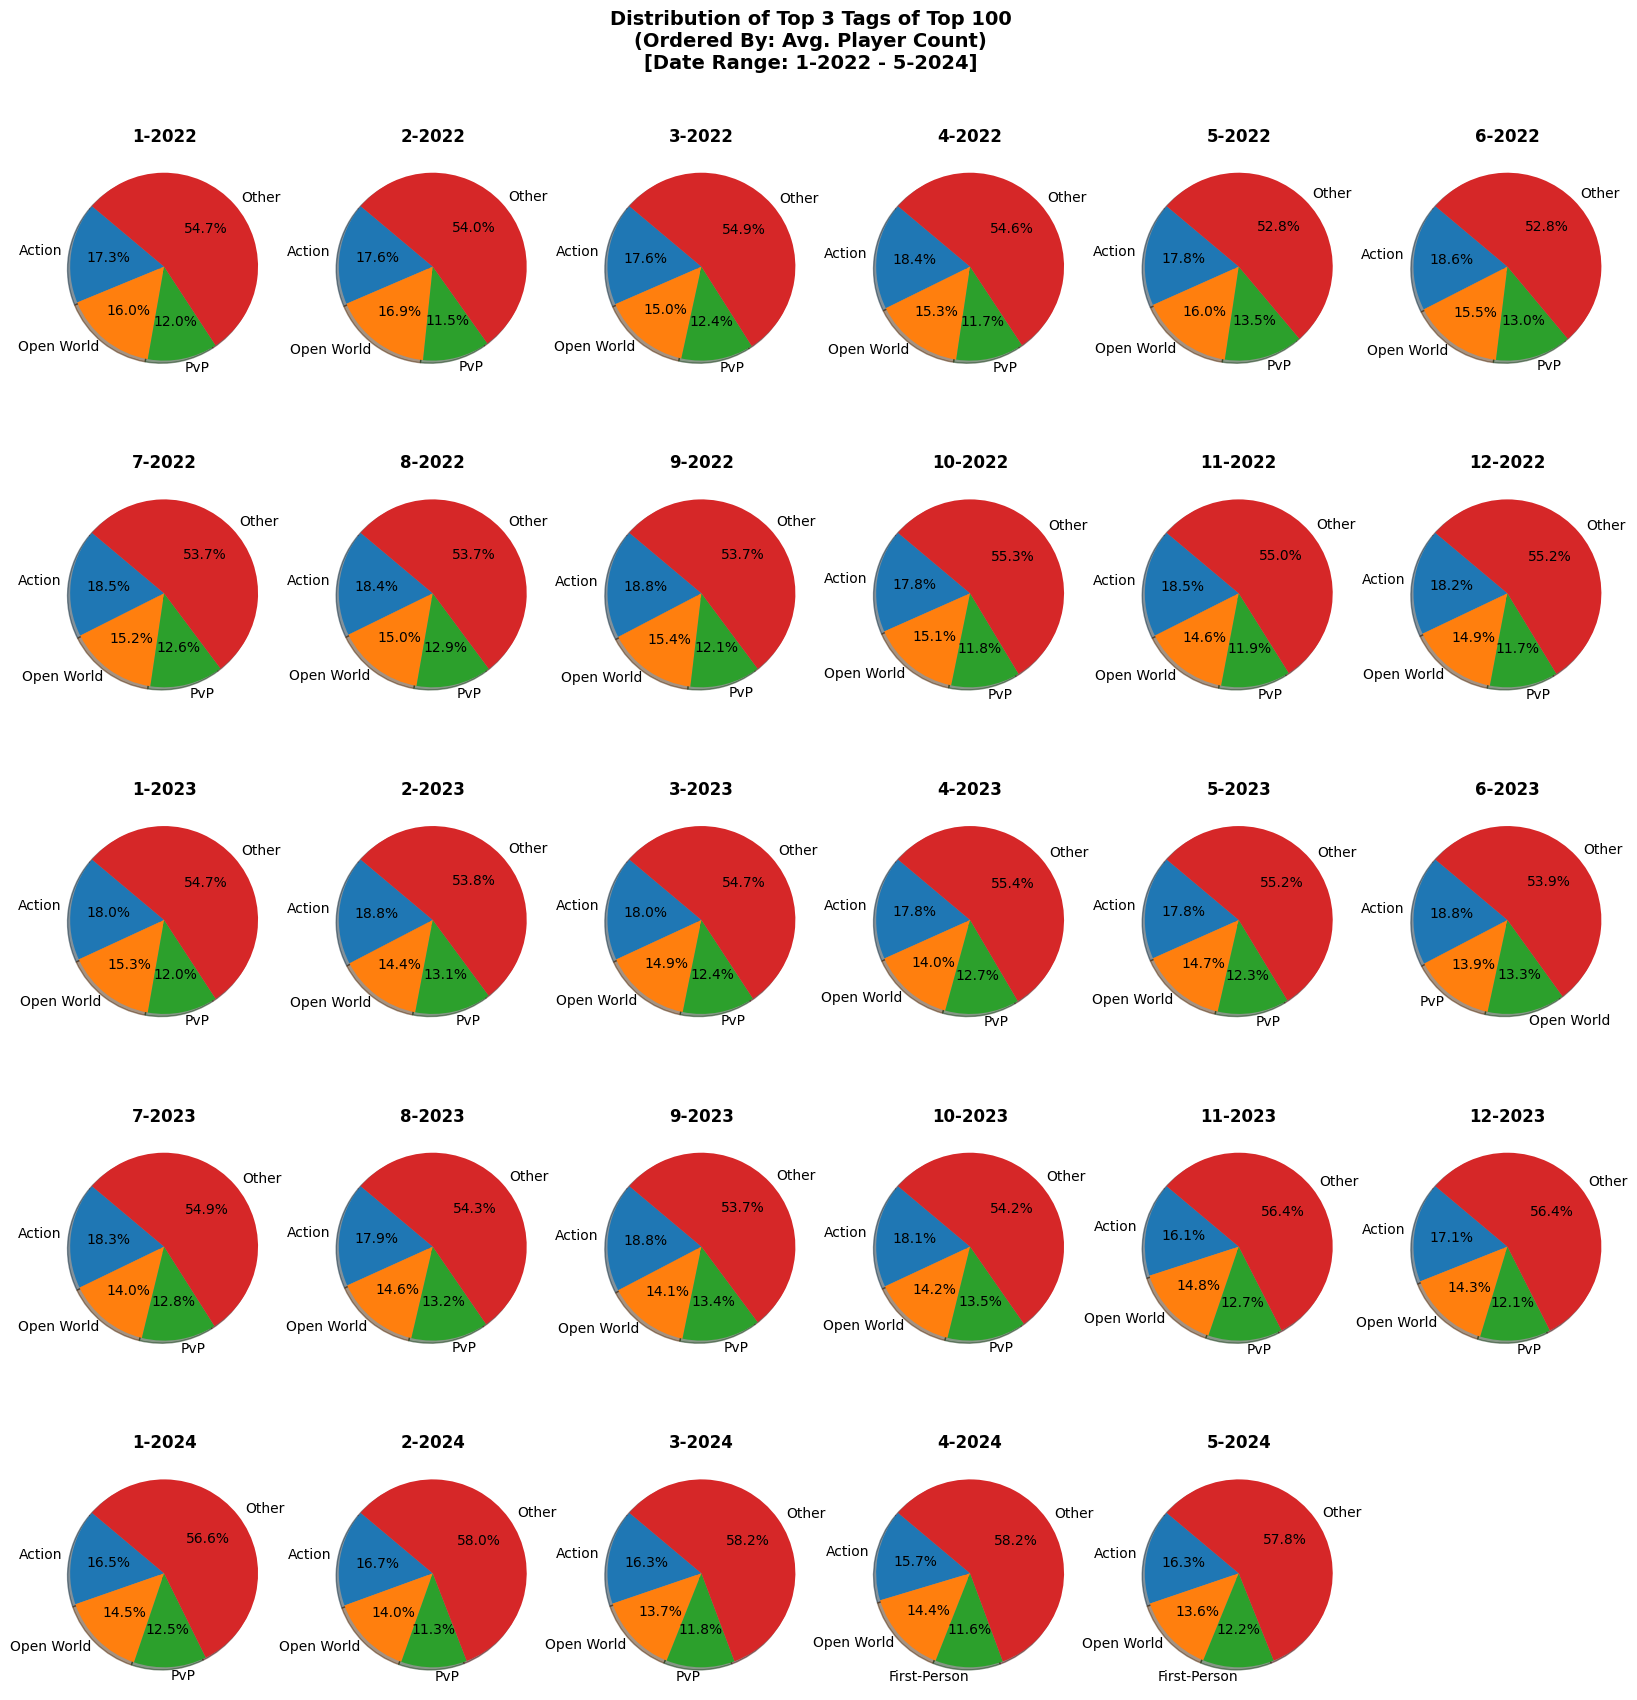

In [16]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
tag_limit = 10 # No. considered tags
visualised_tag_count = 3 # No. tags excluded from 'Other' category
no_cols = 6 # No. columns of subplot (may require adjustment of 'wsapce' argument)
# ---------------------------- #

import math

date_counter = 0 #This is used to hide unused subplots at the bottom of this section

# Dynamic subplot configuration
no_rows = math.ceil(len(list_of_dates) / no_cols)
fig, axs = plt.subplots(no_rows, no_cols, figsize=(20,no_years*10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.suptitle(f'Distribution of Top {visualised_tag_count} Tags of Top {no_games}\n(Ordered By: Avg. Player Count)\n[Date Range: {list_of_dates[0]} - {list_of_dates[len(list_of_dates)-1]}]', 
             fontsize=14,
             fontweight='bold',
             y=0.95)

# For each pie plot (for each date)
for tag_date_dict in list_of_tag_frequency_per_date:
    labels = list(tag_date_dict.keys())
    values = list(tag_date_dict.values())

    # Isolate top 3
    list_of_plot_lables = labels[0:visualised_tag_count]
    list_of_plot_values = values[0:visualised_tag_count]
    
    total_count = sum(values[:tag_limit])
    list_of_plot_values = [ round((x / total_count) * 100,2) for x in list_of_plot_values] # Get percentages

    # 'Other' category 
    list_of_plot_lables.append('Other')
    list_of_plot_values.append(100.00 - sum(list_of_plot_values)) # !Consider removing other and appending them all

    # Plot
    plt.subplot(no_rows, no_cols, date_counter + 1)
    plt.pie(list_of_plot_values, labels=list_of_plot_lables, 
            autopct='%1.1f%%',
            startangle=140, 
            shadow=True)
    plt.axis('equal')
    plt.title(f'{list_of_dates[date_counter]}', fontweight='bold')

    date_counter += 1 

# Hide unused subplots
for ax in axs.flat[date_counter:]:
    ax.axis('off')

### Chart Summary 
The charts above confirm the consistency of the top 3 most popular tags, with 'First-Person' making an appearance in the last two months.

With the stability of the categories known, a more easily digestible plot has been made, below.

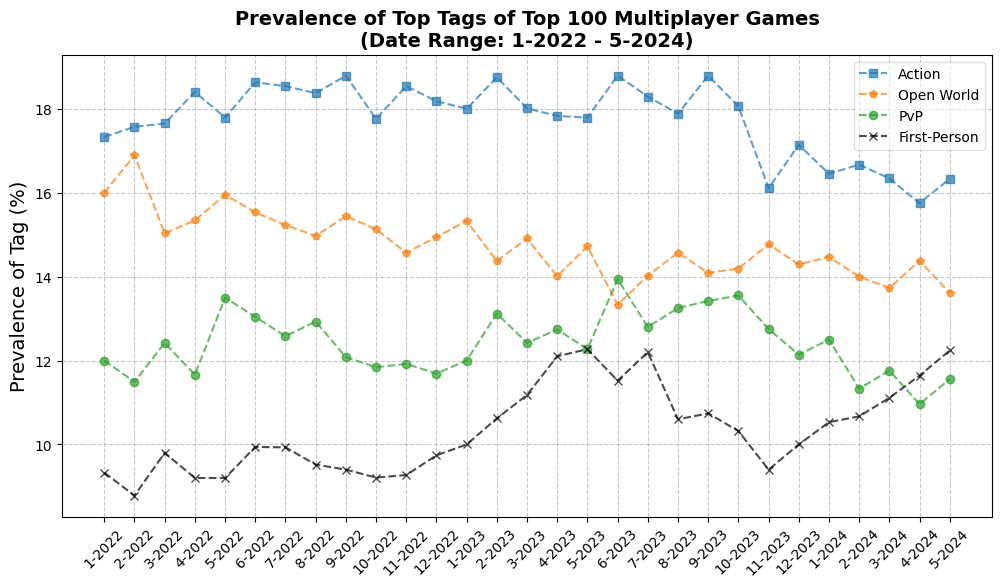

In [17]:
# Get tag frequency for each date
list_of_action_tag_percentage = []
list_of_open_world_tag_percentage = []
list_of_pvp_tag_percentage = []
list_of_first_person_tag_percentage = []

for tag_date_dict in list_of_tag_frequency_per_date:

    total_count = sum(list(tag_date_dict.values())[:tag_limit])
    list_of_action_tag_percentage.append(round((tag_date_dict.get('Action') / total_count) * 100, 2))
    list_of_open_world_tag_percentage.append(round((tag_date_dict.get('Open World') / total_count) * 100, 2))
    list_of_pvp_tag_percentage.append(round((tag_date_dict.get('PvP') / total_count) * 100, 2))
    list_of_first_person_tag_percentage.append(round((tag_date_dict.get('First-Person') / total_count) * 100, 2))

# Plot line graph
plt.figure(figsize=(12,6))

plt.plot(list_of_action_tag_percentage, 
         label='Action', 
         marker='s', 
         linestyle='--',
         alpha=0.7)
plt.plot(list_of_open_world_tag_percentage, 
         label='Open World', 
         marker='p',
         linestyle='--', 
         alpha=0.7)
plt.plot(list_of_pvp_tag_percentage, 
         label='PvP',
         marker='o', 
         linestyle='--', 
         alpha=0.7)
plt.plot(list_of_first_person_tag_percentage,
         label='First-Person', 
         marker='x',
         linestyle='--', 
         color='black', 
         alpha=0.7)

plt.grid(True, linestyle='--',alpha=0.7)

plt.xticks(range(len(list_of_dates)), list_of_dates, rotation=45)

plt.title(f'Prevalence of Top Tags of Top {no_games} Multiplayer Games\n(Date Range: {list_of_dates[0]} - {list_of_dates[len(list_of_dates)-1]})', 
          fontsize=14,
          fontweight='bold')

plt.ylabel('Prevalence of Tag (%)', fontsize=14)

plt.legend(framealpha=0.6)
plt.show()

### Graph Summary 
This graph provides a more easily digestible visualisation of the performance of most frequent tags of multi-player games across the past 2 years.

# Conclusion
Based on the above analysis using the publicly available data from Steam and SteamCharts, it is recommended for the game studio to develop a low priced (<= appx. £12), action-based, multiplayer game if they wish to have the highest chance of success.